# Loading

In [5]:
import pandas as pd
import os

# Define the base directory for the experiments folder
base_dir = os.path.join("..", "experiments")

# Define the paths for the CSV files
cores_test_files = {
    "runtimes_Cores_Test_Sequential": os.path.join(base_dir, "cores_test", "runtimes_Cores_Test_Sequential.csv"),
    "runtimes_Global_Multi_Thread": os.path.join(base_dir, "cores_test", "runtimes_Global_Multi_Thread.csv"),
    "runtimes_Global_Single_Thread": os.path.join(base_dir, "cores_test", "runtimes_Global_Single_Thread.csv"),
    "runtimes_Local_Multi_Thread": os.path.join(base_dir, "cores_test", "runtimes_Local_Multi_Thread.csv"),
    "runtimes_Local_Single_Thread": os.path.join(base_dir, "cores_test", "runtimes_Local_Single_Thread.csv")
}

threshold_experiments_files = {
    "runtimes_Multi_Thread": os.path.join(base_dir, "threshold_experiments/threshold_x", "runtimes_Multi_Thread.csv"),
    "runtimes_Sequential": os.path.join(base_dir, "threshold_experiments/threshold_x", "runtimes_Sequential.csv"),
    "runtimes_Single_Thread": os.path.join(base_dir, "threshold_experiments/threshold_x", "runtimes_Single_Thread.csv")
}

# Load the CSV files into dataframes and display their heads
dataframes = {}

print("Cores Test Files:")
for name, path in cores_test_files.items():
    dataframes[name] = pd.read_csv(path)
    print(f"\n{name}:\n", dataframes[name].head())

print("\nThreshold Experiments Files:")
for name, path in threshold_experiments_files.items():
    dataframes[name] = pd.read_csv(path)
    print(f"\n{name}:\n", dataframes[name].head())

Cores Test Files:

runtimes_Cores_Test_Sequential:
 Empty DataFrame
Columns: [Cores Test Sequential, Threshold: 500, 114807534000, 114429885700, 114794390100, 110922669000, 109837006600, 109933762300, 109787726300, 110010073900, 109906038000, 109800496400, 109921128600, 104473293400, 101569814700, 101293393000, 101554668300]
Index: []

runtimes_Global_Multi_Thread:
    Global Multi Thread  Cores: 2  56806744500  58634173500  57185906000  \
0  Global Multi Thread  Cores: 4  36231987200  35322205600  36279576200   
1  Global Multi Thread  Cores: 6  32776675300  32668944000  33118266700   
2  Global Multi Thread  Cores: 8  32664671700  33199520300  30878489500   

   57083661700  56924417000  56819256800  56802532900  56783949500  \
0  35794798200  35850539700  35504123200  36130731800  36791970600   
1  32311054500  33032982800  32158236200  32315131100  33175771000   
2  32625534700  31703358800  32388443700  31398331800  33231659200   

   56853252300  56808445800  58461788400  5671530

# Threshold 

## Measurements

In [17]:
# Compute statistics for threshold experiments
threshold_stats = {}

# Iterate through the threshold experiment files
for name, path in threshold_experiments_files.items():
    # Load the data
    df = pd.read_csv(path, header=None)
    
    # Extract the threshold values from the second column
    thresholds = df.iloc[:, 1]
    
    # Drop non-numeric columns (first two columns are non-numeric)
    numeric_df = df.iloc[:, 2:].select_dtypes(include=["number"])
    
    # Compute statistics based on the file type
    if "Sequential" in name:
        Tseq = numeric_df.mean().mean() / 1_000_000_000  # Mean of all rows for the sequential approach
        threshold_stats["Tseq"] = Tseq
        print(f"\nThresholds for Sequential: {list(thresholds)}")
        print(f"Tseq (Sequential): {Tseq} seconds")
    elif "Single_Thread" in name:
        T1 = numeric_df.mean().mean() / 1_000_000_000  # Mean of all rows for the single-thread approach
        threshold_stats["T1"] = T1
        print(f"\nThresholds for Single Thread: {list(thresholds)}")
        print(f"T1 (Single Thread): {T1} seconds")
    elif "Multi_Thread" in name:
        # Compute mean for each threshold (row)
        TP = numeric_df.mean(axis=1) / 1_000_000_000  # Mean of each row for multi-threaded approach
        threshold_stats["TP"] = TP
        print(f"\nThresholds for Multi Thread: {list(thresholds)}")
        print("TP (Multi Thread for each threshold):")
        for threshold, time in zip(thresholds, TP):
            print(f"Threshold {threshold}: {time} seconds")

# Display the computed statistics summary
print("\nSummary of Threshold Experiment Statistics:")
print(f"Tseq (Sequential): {threshold_stats.get('Tseq')} seconds")
print(f"T1 (Single Thread): {threshold_stats.get('T1')} seconds")



Thresholds for Multi Thread: ['Threshold: 10', 'Threshold: 500', 'Threshold: 2000', 'Threshold: 5000', 'Threshold: 10000']
TP (Multi Thread for each threshold):
Threshold Threshold: 10: 29.97510224 seconds
Threshold Threshold: 500: 30.102396820066666 seconds
Threshold Threshold: 2000: 33.08703400666667 seconds
Threshold Threshold: 5000: 29.146797706666668 seconds
Threshold Threshold: 10000: 35.94927774 seconds

Thresholds for Sequential: ['Threshold: 10', 'Threshold: 500', 'Threshold: 2000', 'Threshold: 5000', 'Threshold: 10000']
Tseq (Sequential): 99.31667925871999 seconds

Thresholds for Single Thread: ['Threshold: 10', 'Threshold: 500', 'Threshold: 2000', 'Threshold: 5000', 'Threshold: 10000']
T1 (Single Thread): 98.29072583470665 seconds

Summary of Threshold Experiment Statistics:
Tseq (Sequential): 99.31667925871999 seconds
T1 (Single Thread): 98.29072583470665 seconds


## Statistics

In [21]:
# Number of cores (P) used in the multi-threaded implementation
P = 8

# Compute the required metrics
if "Tseq" in threshold_stats and "T1" in threshold_stats and "TP" in threshold_stats:
    Tseq = threshold_stats["Tseq"]
    T1 = threshold_stats["T1"]
    TP = threshold_stats["TP"]  # TP is a series with values for each threshold

    # Overhead
    overhead = T1 / Tseq
    print(f"\nOverhead (T1 / Tseq): {overhead} seconds")

    # Computational Speedup
    computational_speedup = T1 / TP
    print("\nComputational Speedup (T1 / TP):")
    for threshold, speedup in zip(thresholds, computational_speedup):
        print(f"Threshold {threshold}: {speedup}")

    # Efficiency
    efficiency = T1 / (P * TP)
    print("\nEfficiency (T1 / (P * TP)):")
    for threshold, eff in zip(thresholds, efficiency):
        print(f"Threshold {threshold}: {eff}")

    # Application Speedup
    application_speedup = Tseq / TP
    print("\nApplication Speedup (Tseq / TP):")
    for threshold, app_speedup in zip(thresholds, application_speedup):
        print(f"Threshold {threshold}: {app_speedup}")

else:
    print("Error: Missing required statistics (Tseq, T1, or TP) to compute the metrics.")


Overhead (T1 / Tseq): 0.9896698778929093 seconds

Computational Speedup (T1 / TP):
Threshold Threshold: 10: 3.2790789184880076
Threshold Threshold: 500: 3.2652126148700797
Threshold Threshold: 2000: 2.970672010519352
Threshold Threshold: 5000: 3.372265002279303
Threshold Threshold: 10000: 2.7341502253699144

Efficiency (T1 / (P * TP)):
Threshold Threshold: 10: 0.40988486481100095
Threshold Threshold: 500: 0.40815157685875997
Threshold Threshold: 2000: 0.371334001314919
Threshold Threshold: 5000: 0.4215331252849129
Threshold Threshold: 10000: 0.3417687781712393

Application Speedup (Tseq / TP):
Threshold Threshold: 10: 3.3133057716876695
Threshold Threshold: 500: 3.2992947323222497
Threshold Threshold: 2000: 3.001679728642609
Threshold Threshold: 5000: 3.4074645269179453
Threshold Threshold: 10000: 2.7626891415460184


## Plotting

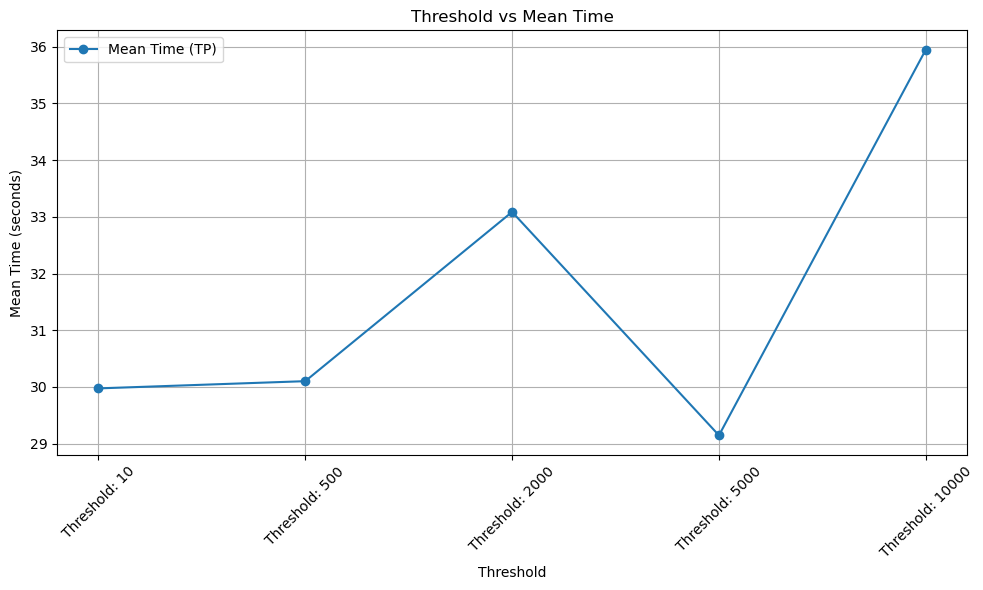

In [22]:
import matplotlib.pyplot as plt

# Ensure the required statistics are available
if "TP" in threshold_stats:
    TP = threshold_stats["TP"]  # Mean time for each threshold
    thresholds = thresholds.astype(str)  # Convert thresholds to strings for labeling

    # Plot the data
    plt.figure(figsize=(10, 6))
    plt.plot(thresholds, TP, marker='o', label="Mean Time (TP)")

    # Add labels and title
    plt.xlabel("Threshold")
    plt.ylabel("Mean Time (seconds)")
    plt.title("Threshold vs Mean Time")
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.grid(True)
    plt.legend()

    # Show the plot
    plt.tight_layout()
    plt.show()
else:
    print("Error: Missing TP data to plot the threshold vs mean time.")

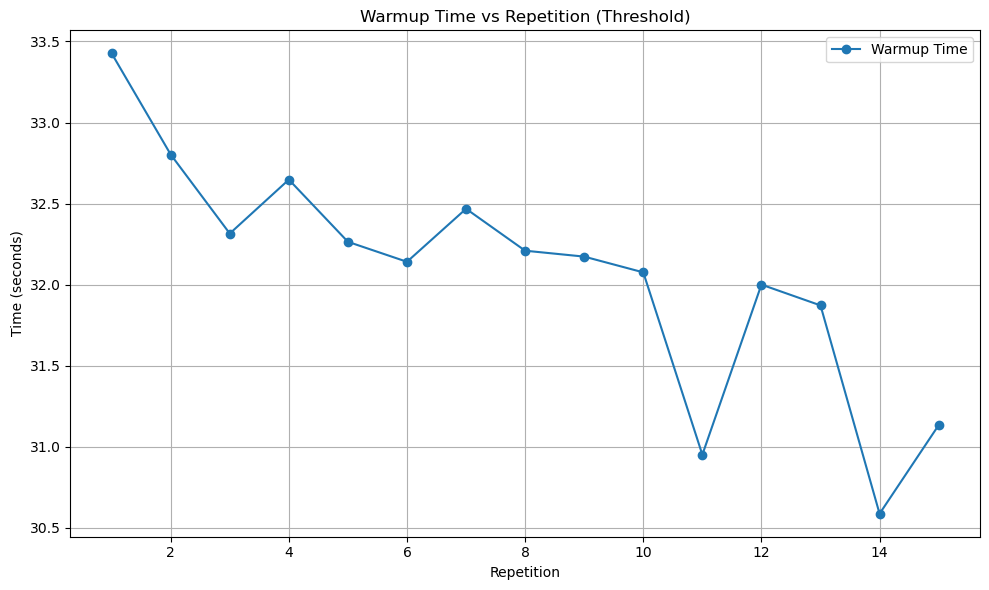

In [32]:
import matplotlib.pyplot as plt

# Ensure the required statistics are available
if "runtimes_Multi_Thread" in dataframes:
    # Extract the data for Multi Thread
    df = dataframes["runtimes_Multi_Thread"]
    
    # Extract repetitions (columns after the first two) and their corresponding times
    repetitions = list(range(1, df.shape[1] - 1))  # Assuming repetitions start from the 3rd column
    warmup_times = df.iloc[:, 2:].mean(axis=0) / 1_000_000_000  # Convert nanoseconds to seconds
    
    # Reverse the warmup times if they are in reverse order
    warmup_times = warmup_times[::-1]  # Reverse the order of the list
    
    # Plot the data
    plt.figure(figsize=(10, 6))
    plt.plot(repetitions, warmup_times, marker='o', label="Warmup Time")
    
    # Add labels and title
    plt.xlabel("Repetition")
    plt.ylabel("Time (seconds)")
    plt.title("Warmup Time vs Repetition (Threshold)")
    plt.grid(True)
    plt.legend()
    
    # Show the plot
    plt.tight_layout()
    plt.show()
else:
    print("Error: Missing runtimes_Multi_Thread data to plot warmup times.")

# Cores

## Measurements

In [25]:
# Compute statistics for cores test files
cores_test_stats = {}

# Iterate through the cores test files
for name, path in cores_test_files.items():
    # Load the data
    df = pd.read_csv(path, header=None)
    
    # Extract the core counts or relevant identifiers from the second column
    cores_or_thresholds = df.iloc[:, 1]
    
    # Drop non-numeric columns (first two columns are non-numeric)
    numeric_df = df.iloc[:, 2:].select_dtypes(include=["number"])
    
    # Compute statistics based on the file type
    if "Sequential" in name:
        Tseq = numeric_df.mean().mean() / 1_000_000_000  # Mean of all rows for the sequential approach
        cores_test_stats["Tseq"] = Tseq
        print(f"\nCores/Thresholds for Sequential: {list(cores_or_thresholds)}")
        print(f"Tseq (Sequential): {Tseq} seconds")
    elif "Single_Thread" in name:
        T1 = numeric_df.mean().mean() / 1_000_000_000  # Mean of all rows for the single-thread approach
        cores_test_stats["T1"] = T1
        print(f"\nCores/Thresholds for Single Thread: {list(cores_or_thresholds)}")
        print(f"T1 (Single Thread): {T1} seconds")
    elif "Multi_Thread" in name:
        # Compute mean for each core count (row)
        TP = numeric_df.mean(axis=1) / 1_000_000_000  # Mean of each row for multi-threaded approach
        cores_test_stats["TP"] = TP
        print(f"\nCores/Thresholds for Multi Thread: {list(cores_or_thresholds)}")
        print("TP (Multi Thread for each core count):")
        for core_count, time in zip(cores_or_thresholds, TP):
            print(f"Cores {core_count}: {time} seconds")

# Display the computed statistics summary
print("\nSummary of Cores Test Statistics:")
print(f"Tseq (Sequential): {cores_test_stats.get('Tseq')} seconds")
print(f"T1 (Single Thread): {cores_test_stats.get('T1')} seconds")
print("TP (Multi Thread for each core count):")
print(cores_test_stats.get("TP"))


Cores/Thresholds for Sequential: ['Threshold: 500']
Tseq (Sequential): 108.86945868666668 seconds

Cores/Thresholds for Multi Thread: ['Cores: 2', 'Cores: 4', 'Cores: 6', 'Cores: 8']
TP (Multi Thread for each core count):
Cores Cores: 2: 57.08861675333333 seconds
Cores Cores: 4: 35.93133923333333 seconds
Cores Cores: 6: 32.462409093333335 seconds
Cores Cores: 8: 32.21193126666667 seconds

Cores/Thresholds for Single Thread: ['Threshold: 500']
T1 (Single Thread): 101.16647024666668 seconds

Cores/Thresholds for Multi Thread: ['Cores: 2', 'Cores: 4', 'Cores: 6', 'Cores: 8']
TP (Multi Thread for each core count):
Cores Cores: 2: 57.15525064 seconds
Cores Cores: 4: 36.976728226666665 seconds
Cores Cores: 6: 35.41031118666666 seconds
Cores Cores: 8: 32.808881086666666 seconds

Cores/Thresholds for Single Thread: ['Threshold: 500']
T1 (Single Thread): 101.21238226 seconds

Summary of Cores Test Statistics:
Tseq (Sequential): 108.86945868666668 seconds
T1 (Single Thread): 101.21238226 second

## Statistics

In [28]:
# Number of cores (P) used in the multi-threaded implementation
P = 8

# Compute the required metrics
if "Tseq" in cores_test_stats and "T1" in cores_test_stats and "TP" in cores_test_stats:
    Tseq = cores_test_stats["Tseq"]
    T1 = cores_test_stats["T1"]
    TP = cores_test_stats["TP"]  # TP is a series with values for each core count

    # Overhead
    overhead = T1 / Tseq
    print(f"\nOverhead (T1 / Tseq): {overhead} seconds")

    # Computational Speedup
    computational_speedup = T1 / TP
    print("\nComputational Speedup (T1 / TP):")
    for core_count, speedup in zip(cores_or_thresholds, computational_speedup):
        print(f"Cores {core_count}: {speedup}")

    # Efficiency
    efficiency = T1 / (P * TP)
    print("\nEfficiency (T1 / (P × TP)):")
    for core_count, eff in zip(cores_or_thresholds, efficiency):
        print(f"Cores {core_count}: {eff}")

    # Application Speedup
    application_speedup = Tseq / TP
    print("\nApplication Speedup (Tseq / TP):")
    for core_count, app_speedup in zip(cores_or_thresholds, application_speedup):
        print(f"Cores {core_count}: {app_speedup}")

else:
    print("Error: Missing required statistics (Tseq, T1, or TP) to compute the metrics.")


Overhead (T1 / Tseq): 0.9296673601665988 seconds

Computational Speedup (T1 / TP):
Cores Threshold: 500: 1.7708326203921272

Efficiency (T1 / (P × TP)):
Cores Threshold: 500: 0.2213540775490159

Application Speedup (Tseq / TP):
Cores Threshold: 500: 1.9048024016620195


## Plotting

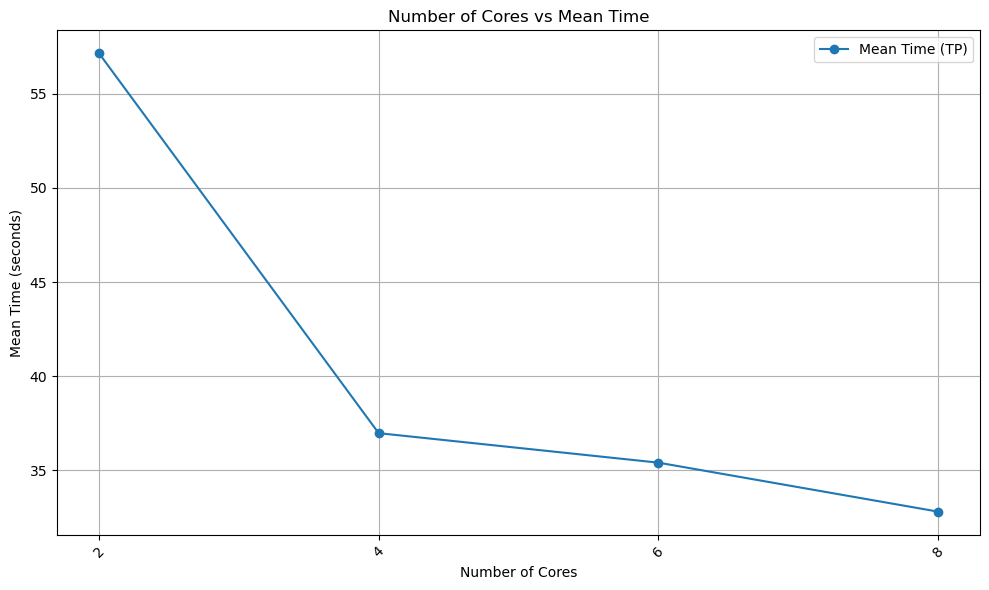

In [30]:
import matplotlib.pyplot as plt

# Ensure the required statistics are available
if "TP" in cores_test_stats:
    TP = cores_test_stats["TP"]  # Mean time for each core count
    cores_or_thresholds = ["2", "4", "6", "8"]  # Manually define core counts for multi-threaded data

    # Plot the data
    plt.figure(figsize=(10, 6))
    plt.plot(cores_or_thresholds, TP, marker='o', label="Mean Time (TP)")

    # Add labels and title
    plt.xlabel("Number of Cores")
    plt.ylabel("Mean Time (seconds)")
    plt.title("Number of Cores vs Mean Time")
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.grid(True)
    plt.legend()

    # Show the plot
    plt.tight_layout()
    plt.show()
else:
    print("Error: Missing TP data to plot the number of cores vs mean time.")